In [ ]:
# !pip install sampo
# !source project_rcpsp/bin/activate

In [ ]:
from sampo.generator import SimpleSynthetic
from sampo.generator import SyntheticGraphType


ss = SimpleSynthetic()
contractors = [ss.contractor(x) for x in range(10,14) ]
wg = ss.work_graph(mode=SyntheticGraphType.GENERAL,
                   cluster_counts=10,
                   bottom_border=100,
                   top_border=200)

### ???

# dense = wg.adj_matrix.toarray()  # Получите массив 1x206, заполненный нулями


# print(dense.shape)

In [ ]:
# Из SAMPO DataFrame → RCPSP-совместимый формат
import pandas as pd
df = wg.to_frame()

# Создаём mapping ID → индекс (0..n-1)
id_to_idx = {aid: i for i, aid in enumerate(df['activity_id'])}

# Строим pred_list в числовых индексах
pred_list = {}
for _, row in df.iterrows():
    idx = id_to_idx[row['activity_id']]
    if pd.isna(row['predecessor_ids']) or row['predecessor_ids'] == '':
        preds = []
    else:
        pred_ids = row['predecessor_ids'].split(',')
        preds = [id_to_idx[pid.strip()] for pid in pred_ids]
    pred_list[idx] = preds

In [ ]:
wg.start, wg.finish

In [ ]:
len(wg.nodes)

In [ ]:
wg.to_frame()

In [ ]:
contractors

# Graph description

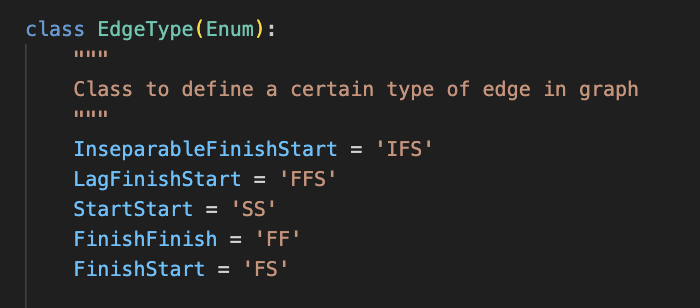

Лежит это в sampo/schemas/graph.py

-------


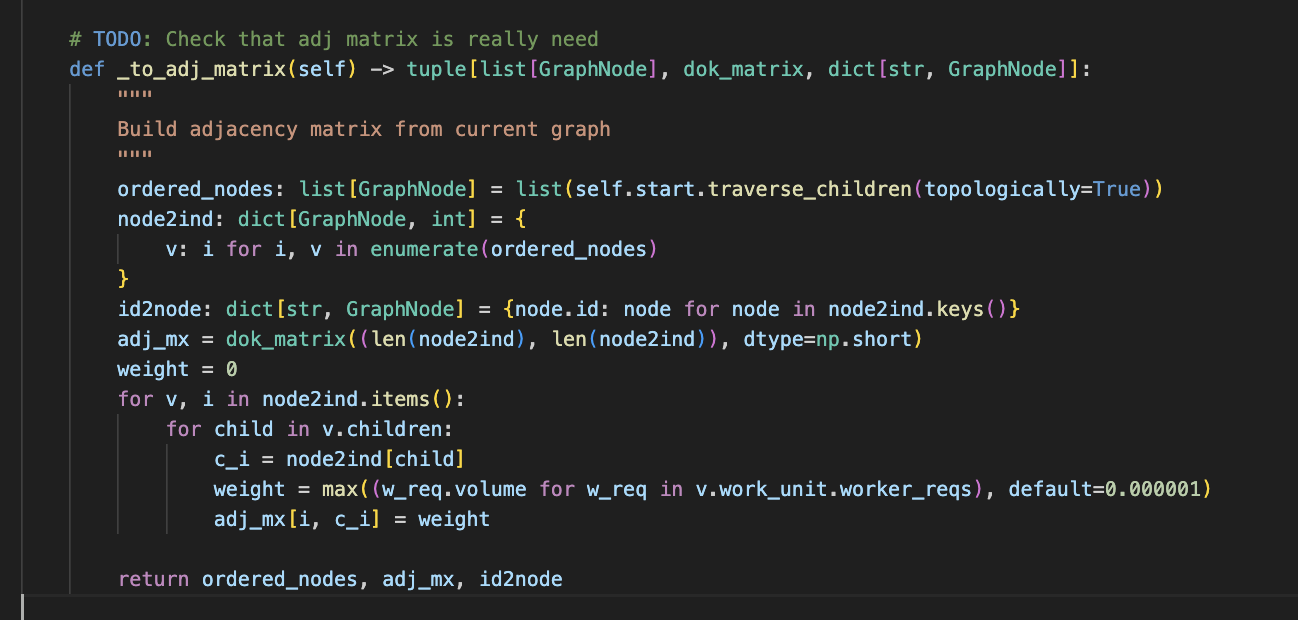  

Принцип заполнения adjmatrix

In [ ]:
wg.to_frame()['model_name'][20]

In [ ]:
from sampo.scheduler.genetic import GeneticScheduler

scheduler = GeneticScheduler(mutate_order=0.2,
                             mutate_resources=0.1)

schedule = scheduler.schedule(wg, contractors)[0]

In [ ]:
schedule.to_schedule_work_dict

In [ ]:
# Для больших графов
# from tqdm import tqdm
# from sampo.generator import SimpleSynthetic

# ss = SimpleSynthetic(rand=231)

# # for size in range(100, 500 + 1, 100):
# for size in ([15, 25]):
#     for i in tqdm(range(10)):
#         wg = ss.work_graph(bottom_border=size - 5,
#                            top_border=size)
#         while not (size - 5 <= wg.vertex_count <= size):
#             wg = ss.work_graph(bottom_border=size -6,
#                                top_border=size)
#         wg.dump('wgs', f'{size}/{size}_{i}')

In [ ]:

from tqdm import tqdm
from sampo.generator import SimpleSynthetic

ss = SimpleSynthetic(rand=231)

# for size in range(100, 500 + 1, 100):
for i in range(1,50):
    wg = ss.small_work_graph()
    wg.dump('wgs', f'10/wg_{i+1}')